<a href="https://colab.research.google.com/github/NMT20104010/BTVN/blob/main/Guava_Disease_Recognition(%20AI%20Cuoi%20Ki%20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Data/Guava Disease Recognition


/content/drive/MyDrive/Data/Guava Disease Recognition


In [ ]:
ls

Guava.h5  Train/  Val/


In [ ]:
import tensorflow as tf

IMG_SIZE = (255, 255)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    './Train/',
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    shuffle = True
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)



valid_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    './Val/',
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

class_names = valid_datasets.class_names
valid_data = valid_datasets.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 1475 files belonging to 7 classes.
Found 546 files belonging to 7 classes.


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(255,255,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 255, 255, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 32, 32, 128)     

In [ ]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_data, epochs=30, batch_size=128)

Epoch 1/30
47/47 [==============================] - 270s 6s/step - loss: 14.7365 - accuracy: 0.5400
Epoch 2/30
47/47 [==============================] - 260s 6s/step - loss: 0.9407 - accuracy: 0.6628
Epoch 3/30
47/47 [==============================] - 262s 6s/step - loss: 0.7993 - accuracy: 0.7117
Epoch 4/30
47/47 [==============================] - 260s 6s/step - loss: 0.6640 - accuracy: 0.7714
Epoch 5/30
47/47 [==============================] - 257s 5s/step - loss: 0.6073 - accuracy: 0.8094
Epoch 6/30
47/47 [==============================] - 259s 6s/step - loss: 0.4547 - accuracy: 0.8412
Epoch 7/30
47/47 [==============================] - 260s 6s/step - loss: 0.3423 - accuracy: 0.8840
Epoch 8/30
47/47 [==============================] - 256s 5s/step - loss: 0.2426 - accuracy: 0.9308
Epoch 9/30
47/47 [==============================] - 256s 5s/step - loss: 0.1835 - accuracy: 0.9389
Epoch 10/30
47/47 [==============================] - 260s 6s/step - loss: 0.1850 - accuracy: 0.9410
Epoch 11

In [ ]:
model.save('Guava Disease.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_guava=load_model('Guava Disease.h5')

In [ ]:
model.evaluate(train_data)
model.evaluate(valid_datasets)

18/18 [==============================] - 131s 4s/step - loss: 3.7081 - accuracy: 0.6960


[3.7080600261688232, 0.6959707140922546]

1/1 [==============================] - 0s 123ms/step
Mummification


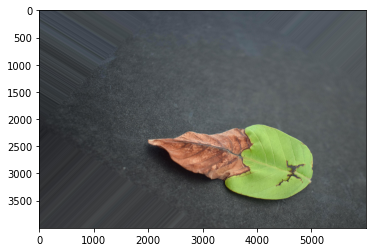

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (255,255)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Canker', 'Healthy','Mummification','Phytopthora', 'Rust', 'Scab', 'Styler and root']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/m5.jpeg')